In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

Считывние сетки, элементов и материала из файла data.txt

In [ ]:

with open('data.txt') as json_file:
    data = json.load(json_file)
    mesh = data[0]
    elements = data[1]
    material = data[2]

Инициализация

In [ ]:
n = 25 # Число узлов
m = 32 # Число элементов
temp = [10, 0, 0, 0, 20, 10, 0, 0, 0, 20, 10, 0, 0, 0, 20, 10, 
        0, 0, 0, 20, 10, 0, 0, 0, 20] # Температура в узлах
f = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0] # Вектор правых частей
k = [[0] * 3 for i in range(3)] # Элементная матрица
a = [[0] * n for i in range(n)] # Матрицы жесткости

Цикл по элементам

In [ ]:
for i in range(m):
    s=[0,0,0]
    x=[0,0,0]
    y=[0,0,0]
    b=[0,0,0]
    c=[0,0,0]   
 
    for j in range(3):
        s[j]=elements[i][j]
    
    for j in range(3):             
        x[j]=mesh[s[j]-1][0]        
        y[j]=mesh[s[j]-1][1]        

    b[0]=y[1]-y[2]                  
    b[1]=y[2]-y[0]                 
    b[2]=y[0]-y[1]                 
    c[0]=x[2]-x[1]
    c[1]=x[0]-x[2]
    c[2]=x[1]-x[0]

    A=(x[1] * y[2] - x[2] * y[1] + x[0] * y[1] -\
       x[0] * y[2] + x[2] * y[0] - x[1] * y[0]) / 2
    
    for j in range(3):
        for l in range(3):
            k[j][l]=material[i][0]*b[j] * b[l] / (4 * A) +\
             material[i][1] * c[j] * c[l] / (4 * A)
    
    for j in range(3):
        for r in range(3):
            a[s[j] - 1][s[r] - 1] = a[s[j] - 1][s[r] - 1] + k[j][r]

    for j in range(3):
        f[s[j] - 1] = f[s[j] - 1] + b[j]

Перенос граничных условий Дирихле в матрицу и вектор правых частей

In [ ]:
for s in range(n):
    if (temp[s]):
        a[s][s]=1        
        f[s]=temp[s]     
        for k in range(n): 
            if (k!=s):                                     
                a[s][k]=0                                  
                f[k] = f[k] - a[k][s] * temp[s]    
                a[k][s] = 0                               

Решение системы Ku = f

In [ ]:
u = np.linalg.solve(a, f) 

Вывод температуры в узлах

In [ ]:
u = pd.DataFrame(np.matrix(np.reshape(u, (5,5))),
                   columns=['0', '0.25', '0.5', '0.75', '1'],
                  index=['1', '0.75', '0.5', '0.25', '0'])
u

,0,0.25,0.5,0.75,1
1,10.0,12.5,15.0,17.5,20.0
0.75,10.0,12.5,15.0,17.5,20.0
0.5,10.0,12.5,15.0,17.5,20.0
0.25,10.0,12.5,15.0,17.5,20.0
0,10.0,12.5,15.0,17.5,20.0


Цветовая модель перехода тепла по пластине

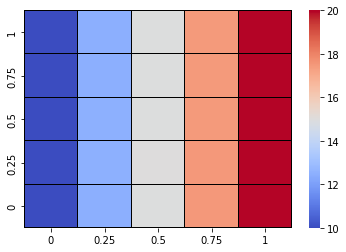

In [ ]:
sns.heatmap(u, cmap = 'coolwarm', linewidths=0.1, linecolor='black')